In [2]:
#Your code goes here
#%%
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import math
import sys
from pandas.plotting import table
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from mnist import MNIST


#one hot encoder 
def kfolds(X,Y,k):
    n = X.shape[0]
    m_k = round(n/k)
    data = np.hstack((X,Y))
    K_folds = []

    for i in range(k):
        if i < k-1:
            K_folds.append(data[m_k*i:m_k*(i+1),:])
        else :
            K_folds.append(data[m_k*i:,:])
    return K_folds

# def cross_validation(X,Y,K,lr,iteration,adaptive=False,lasso=False,alpha=None,Beta=None,batch_size=None,lamda=None):
#     m,n = X.shape 
#     m,k = Y.shape 
#     Kfolds  = kfolds(X,Y,K)
#     cross_val = []
#     max_micro = 0
#     for i in range(K):
#         #vertical stacking of other than validation set of kfolds array
#         train_set = Kfolds[:i]+Kfolds[i+1:]
#         train_set = np.vstack((train_set))

#         #trainX and trainY distinguishing
#         trainX = train_set[:,:train_set.shape[1]-k]
#         trainY = train_set[:,train_set.shape[1]-k:]

#         #validation set 
#         val_set = Kfolds[i]

#         #valx and valy distinguishing
#         valX = val_set[:,:val_set.shape[1]-k]
#         valY = val_set[:,val_set.shape[1]-k:]
        
#         #optimum weights from ridge normal equation
#         if(lasso==True):
#             pass
#         if(alpha!=None and Beta!=None):
#             _,theta,_ = run_model(trainX,trainY,lr,iteration,alpha=alpha,Beta=Beta)
#         if(adaptive==True):
#             _,theta,_ = run_model(trainX,trainY,lr,iteration)


#         #calculating loss value over validation set
#         pred = np.argmax(softmax_func(theta,valX),axis=1)+1
#         pred = onehotEncoder(pred,5)
#         microf1,_,_ = micro_scores(valY,pred)
#         if(microf1>max_micro):
#             max_micro = microf1

#         #appending this loss value in cross_val array
#         cross_val.append(microf1)
#     print(max_micro)
#     return cross_val

def confusion_matrix(y_true,y_pred,onehotencoded=True):
    if(onehotencoded==True):
        m,k = y_true.shape
        return np.matmul(y_true.T,y_pred).astype(int)

def normalized_confusion_marix(y_true,y_pred):
    confmatrix = confusion_matrix(y_true,y_pred)
    confmatrix = (confmatrix/np.sum(confmatrix,axis=1).reshape((confmatrix.shape[0],1))).astype(float)
    return confmatrix

def precesion_recall(y_true,y_pred):
    #precesion = TP/TP+FP
    #recall = TP/TP+FN
    confmatrix  = confusion_matrix(y_true,y_pred)
    row_sum_confmatrix = np.sum(confmatrix,axis=0).tolist()
    column_sum_confmatrix= np.sum(confmatrix,axis=1).tolist()
    precesion = []
    recall = []
    tp = []
    for i in range(confmatrix.shape[0]):
        for j in range(confmatrix.shape[1]):
            if(i==j):
                tp.append(confmatrix[i][j])
                precesion.append(round(float(confmatrix[i][j]/row_sum_confmatrix[i]),4))
                recall.append(round(float(confmatrix[i][j]/column_sum_confmatrix[i]),4))
    fp = np.subtract(np.array(row_sum_confmatrix), np.array(tp)).tolist()
    fn =  np.subtract(np.array(column_sum_confmatrix), np.array(tp)).tolist()
    return precesion,recall,tp,fp,fn


def micro_scores(y_true,y_pred):
    # avg_prec = float(np.nansum(precesion)/len(precesion))
    # avg_rec = float(np.nansum(recall)/len(recall))
    # f1score = 2*(avg_prec*avg_rec)/(avg_prec+avg_rec)
    _,_,tp,fp,fn = precesion_recall(y_true,y_pred)
    tp_sum = sum(tp)
    tp_fp_sum = sum(tp)+sum(fp)
    tp_fn_sum = tp_sum + sum(fn)
    micro_avg_prec = round(float(tp_sum/tp_fp_sum),3)
    micro_avg_rec = round(float(tp_sum/tp_fn_sum),3)
    micro_avg_f1 = round((2*micro_avg_prec*micro_avg_rec)/(micro_avg_prec+micro_avg_rec),3)
    return micro_avg_f1,micro_avg_prec,micro_avg_rec

def macro_scores(y_true,y_pred):
    precesion,recall,_,_,_ = precesion_recall(y_true,y_pred)
    prec_avg =round(float(np.nansum(precesion)/(len(precesion))),3)
    rec_avg = round(float(np.nansum(recall)/len(recall)),3)
    macro_f1 = round((2*prec_avg*rec_avg)/(prec_avg+rec_avg),3)
    return macro_f1,prec_avg,rec_avg

def save_image(df,table_name):
    print(df)
    fig, ax = plt.subplots(figsize=(20, 2)) # set size frame
    ax.xaxis.set_visible(False)  # hide the x axis
    ax.yaxis.set_visible(False)  # hide the y axis
    ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
    tabla = table(ax, df, loc='upper right', colWidths=[0.1]*len(df.columns))  # where df is your data frame
    tabla.auto_set_font_size(False) # Activate set fontsize manually
    tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
    tabla.scale(1.3, 1.3) # change size table
    plt.savefig(table_name)

def fft_image_data(trainx):
    #shape of trainx = m,n
    ## Functions to go from image to frequency-image and back
    im2freq = lambda data: fp.rfft(fp.rfft(data, axis=0),
                                   axis=1)
    freq2im = lambda f: fp.irfft(fp.irfft(f, axis=1),
                                 axis=0)

    ## Read in data file and transform
    for i in range(trainx.shape[0]):
        curr_img = trainx[i,:].reshape((32,32))
        data = curr_img

        freq = im2freq(data)
        back = freq2im(freq)
        assert(np.allclose(data, back))

        ## Helper functions to rescale a frequency-image to [0, 255] and save
        remmax = lambda x: x/x.max()
        remmin = lambda x: x - np.amin(x, axis=(0,1), keepdims=True)
        touint8 = lambda x: (remmax(remmin(x))*(256-1e-4)).astype(int)
        trainx[i,:] = touint8(freq).reshape((1,1024))
    return trainx

def onehotEncoder(array,k_class):
    if(type(array)==list):
        array = np.array(array)
    assert len(array.shape)==1
    onehotencoded = np.zeros((array.shape[0],k_class))
    array = array.reshape((array.shape[0],))
    for i in range(array.shape[0]):
        onehotencoded[i,array[i]-1] = 1
    return onehotencoded

def sigmoid_func(X):
        return 1/(1+np.exp(-X))

def softmax_stable(y):
    y_pred_max = -1*np.max(y,axis=1,keepdims=True)
    y = np.exp(y+y_pred_max)
    column_wise_sum = np.sum(y,axis=1,keepdims=True)
    return (y/column_wise_sum)

def relu_func(X):
        X = np.where(X<0,0,X)
        return X
def leaky_relu(X):
    X = np.where(X<0,0.01*X,X)
    return X

def leaky_relu_derivative(x):
    x = np.where(x<0,0.01,1)
    return x

def relu_derivative(x):
    x = np.where(x<0,0,1)
    return x
    
def tanh_func(X):
        return np.tanh(X)

def tanh_prime(X):
    return 1-np.power(tanh_func(X),2)

def sigmoid_prime(X):
    return sigmoid_func(X)*(1-sigmoid_func(X))

def softmax_prime(y):
    return softmax_stable(y)*(1-softmax_stable(y))

class neuron_layer:
    def __init__(self,inputs_neurons,number_of_neurons):
        self.inputs_neurons=inputs_neurons
        self.number_of_neurons = number_of_neurons
        self.dropout_mask=None
        self.batch_normalized_layer=None
        self.set_weights(np.sqrt(2/inputs_neurons)*np.random.uniform(-1,1,(inputs_neurons,number_of_neurons)))
        self.set_bias(np.random.uniform(-1,1,(1,number_of_neurons)))

    def set_weights(self,weights):
        self.weights = weights
    
    def get_weights(self):
        return self.weights
    
    def set_bias(self,bias):
        self.bias = bias
    
    def get_bias(self):
        return self.bias

    def layer_output(self,inputs):
        self.layer_output_z = np.matmul(inputs,self.weights) +self.bias
    
    def activate_layer(self,sigmoid=False,relu=False,tanh=False,softmax=False,leakyrelu=False):
        self.activate_a=None
        if(sigmoid==True):
            if(self.batch_normalized_layer is not None):
                self.activate_a = sigmoid_func(self.batch_normalized_layer)
            else:
                self.activate_a = sigmoid_func(self.layer_output_z)
            # if(isoutput==False):
            #     self.activate_a = np.hstack((np.ones((self.activate_a.shape[0],1)),self.activate_a))
        if(leakyrelu==True):
            if(self.batch_normalized_layer is None):
                self.activate_a = leaky_relu(self.layer_output_z)
            else:
                self.activate_a = leaky_relu(self.batch_normalized_layer)
        if(relu==True):
            if(self.batch_normalized_layer is None):
                self.activate_a = relu_func(self.layer_output_z)
            else:
                self.activate_a = relu_func(self.batch_normalized_layer)
            # if(isoutput==False):
            #     self.activate_a = np.hstack((np.ones((self.activate_a.shape[0],1)),self.activate_a))
        if(tanh==True):
            if(self.batch_normalized_layer is not None):
                self.activate_a = tanh_func(self.batch_normalized_layer)
            else:
                self.activate_a = tanh_func(self.layer_output_z)
            # if(isoutput==False):
            #     self.activate_a = np.hstack((np.ones((self.activate_a.shape[0],1)),self.activate_a))
        if(softmax==True):
            if(self.batch_normalized_layer is not None):
                self.activate_a = softmax_stable(self.batch_normalized_layer)
            else:
                self.activate_a = softmax_stable(self.layer_output_z)
    



    


class Neural_a:

    def __init__(self,trainX,trainY,n_output_neurons,n_hl_neurons,ismulti=False,activation_func="sigmoid",drop_prob=0,lamdaa=None,isBatchNormalize=False):
        assert type(n_hl_neurons)==list
        # assert (len(trainY.shape))==2
        self.trainX = trainX
        self.trainY = trainY
        self.lamdaa=lamdaa
        self.batch_normalize=isBatchNormalize
        self.drop_prob=drop_prob
        #activation function for hidden layer, wheather sigmoid or relu or tanh
        self.activation_func = activation_func

        #numbe of hidden layers
        self.n_layers = len(n_hl_neurons)

        #number of units in output layer
        self.n_output_neurons = n_output_neurons

        #whether classification is multiclass or binary
        self.ismulti = ismulti

        #to create architecture of network
        self.create_architechure(n_hl_neurons)
    
    def create_architechure(self,neurons_list):
        if(self.ismulti==True):
            assert self.n_output_neurons > 1
        '''
        neurons list is a list containing number of neurons in each hidden layer
        length of list should be equal to number of hidden layers
        it should not have input layer and output layer shape
        '''
        assert type(neurons_list)==list

        #first hidden layer
        self.layers = [neuron_layer(self.trainX.shape[1],neurons_list[0])]

        #adding hidden layer upto output layer
        self.layers =self.layers + [neuron_layer(neurons_list[i-1],neurons_list[i]) for i in range(1,len(neurons_list))]

        #output layer which is last layer
        self.layers = self.layers+ [neuron_layer(neurons_list[-1],self.n_output_neurons)]

    def forward_propagate(self,x,istraining=True):

        #to feed input to first hidden layer
        self.layers[0].layer_output(x)
        if(self.batch_normalize==True):
            self.layers[0].batch_normalized_layer = self.batch_normalization(self.layers[0].layer_output_z)
        for i in range(1,len(self.layers)):
            #activation of hidden layer

            if(self.activation_func =="sigmoid"):
                self.layers[i-1].activate_layer(sigmoid=True)
                self.layers[i-1].dropout_mask = self.dropout(self.layers[i-1].activate_a,self.drop_prob)
            if(self.activation_func =='relu'):
                self.layers[i-1].activate_layer(relu=True)
                self.layers[i-1].dropout_mask = self.dropout(self.layers[i-1].activate_a,self.drop_prob)
            if(self.activation_func =='leaky_relu'):
                self.layers[i-1].activate_layer(leakyrelu=True)
                self.layers[i-1].dropout_mask = self.dropout(self.layers[i-1].activate_a,self.drop_prob)
            if(self.activation_func =='tanh'):
                self.layers[i-1].activate_layer(tanh=True)
                self.layers[i-1].dropout_mask = self.dropout(self.layers[i-1].activate_a,self.drop_prob)
            
            #feeding next hidden layer
            if(istraining==True):
                self.layers[i].layer_output(self.layers[i-1].dropout_mask)
                if(self.batch_normalize==True):
                    self.layers[i].batch_normalized_layer = self.batch_normalization(self.layers[i].layer_output_z)
            if(istraining==False):
                self.layers[i].layer_output(self.layers[i-1].activate_a)
                if(self.batch_normalize==True):
                    self.layers[i].batch_normalized_layer = self.batch_normalization(self.layers[i].layer_output_z)

        #activation of last layer 
        if(self.ismulti==True):
            self.layers[-1].activate_layer(softmax=True)
        else:
            self.layers[-1].activate_layer(sigmoid=True)
        return self.layers[-1].activate_a

    def Binary_cross_entropy_loss(self,y,outputs):
        term1 = y*np.log(outputs[:,0])
        term2 = (1-y)*np.log(1-outputs[:,0])
        return -(1/y.shape[0])*np.sum(term1+term2)
    
    def multiclass_ce_loss(self,y,outputs):
        frob_sum=0
        for i in range(len(self.layers)):
            frob_sum = frob_sum+np.sum(np.power(self.layers[i].weights,2))
        return -1*(np.sum(y*np.log(outputs+1e-6))/y.shape[0]) + (self.lamdaa/(2*y.shape[0]))*(frob_sum)
    
    def multiclass_ce_derivative(self,y):
        assert self.layers[-1].activate_a.shape ==y.shape
        return (self.layers[-1].activate_a - y)/y.shape[0]


    def cost_derivative(self,trainy):
        #shape of y --> m*2
        #shape of t --> m*1
        y  = self.layers[-1].activate_a 
        t = trainy
        return (y-t)/trainy.shape[0]   #dl/dy
    
    def dropout(self,X,drop_prob):
        assert 0<=drop_prob<=1
        if(drop_prob==1):
            return np.zeros_like(X)
        mask = np.random.uniform(0,1,X.shape) > drop_prob
        return (mask*X)/(1.0-drop_prob)
        
    
    def mini_batch(self,batch_size):
        number_of_mini_batch=math.floor(self.trainX.shape[0]/batch_size)
        self.batches_x = []
        self.batches_y =[]
        for i in range(number_of_mini_batch):
            self.batches_x.append(self.trainX[i*batch_size:(i+1)*batch_size,:])
            self.batches_y.append(self.trainY[i*batch_size:(i+1)*batch_size,:])
        if(number_of_mini_batch*batch_size<self.trainX.shape[0]):
            self.batches_x.append(self.trainX[number_of_mini_batch*batch_size:,:])
            self.batches_y.append(self.trainY[number_of_mini_batch*batch_size:,:])
        
        return self.batches_x,self.batches_y
        
        
    def batch_normalization(self,X):
        # scaler = StandardScaler()
        # X  = scaler.fit_transform(X)
        X_mu = np.mean(X,axis=0,keepdims=True)
        X_var = np.var(X,axis=0,keepdims=True)
        X = (X-X_mu)/np.sqrt(X_var+1e-6)
        return X

    def accuracy(self,y,outputs):
        '''
        y and outputs are of size m,k where k is number of classes
        '''
        y =np.argmax(y,axis=1)
        outputs = np.argmax(outputs,axis=1)
        acc = [1 if x==y else 0 for (x,y) in zip(y,outputs)]
        return float(np.sum(acc)/len(acc))
    
    def predictions(self,x):
        pred_outputs = self.forward_propagate(x)
        return pred_outputs

    
    def back_propagate(self,x,y):

        #initializing all weights to zeros
        back_prop_weights_updates = [np.zeros((w.get_weights().shape)) for w in self.layers]
        back_prop_bias_updates = [np.zeros(b.get_bias().shape) for b in self.layers]

        #feed forward 
        self.forward_propagate(x)

        #delta for output layer
        if(self.ismulti==True):
            delta = self.multiclass_ce_derivative(y)
        else:
            delta = self.cost_derivative(y)  #dl/dz

        #dw and db for output layer
        back_prop_weights_updates[-1] = np.matmul(self.layers[-2].activate_a.T,delta) + (self.lamdaa/y.shape[0])*(self.layers[-1].weights)
        back_prop_bias_updates[-1] = np.sum(delta,axis=0,keepdims=True)

        for i in range(1,len(self.layers)):
            curr_layer = self.layers[-(i+1)]
            prev_layer = self.layers[-i]
            if(self.activation_func=='sigmoid'):
                sp = curr_layer.activate_a*(1-curr_layer.activate_a)
            if(self.activation_func=='relu'):
                sp = relu_derivative(curr_layer.layer_output_z)
            if(self.activation_func =='tanh'):
                sp = tanh_prime(curr_layer.layer_output_z)
            if(self.activation_func =='leaky_relu'):
                sp = leaky_relu_derivative(curr_layer.layer_output_z)
            #doubt since calculation formula is not correct i guess
            delta = np.matmul(delta,prev_layer.get_weights().T)*sp*(curr_layer.dropout_mask/(1.0-self.drop_prob))
            if(i==(len(self.layers)-1)):
                activations = x.T
            else:
                activations = self.layers[-(i+2)].activate_a.T
            # print(back_prop_weights_updates[-(i+1)].shape)
            back_prop_weights_updates[-(i+1)]= np.dot(activations,delta) + (self.lamdaa/y.shape[0])*self.layers[-(i+1)].weights
            back_prop_bias_updates[-(i+1)]= np.sum(delta,axis=0,keepdims=True)
        
        return back_prop_weights_updates,back_prop_bias_updates

    def train_network(self,valx,valy,learning_rate,iterations,n_batches,adaptive=False):
        self.mini_batch(n_batches)
        x,y = self.batches_x,self.batches_y
        k = len(x)
        epochs=0
        cost_history=[]
        train_cost_hist =[]
        val_cost_hist = []
        train_acc_hist=[]
        val_acc_hist=[]
        for i in range(iterations):
            # weights = [np.zeros(w.get_weights().shape) for w in self.layers]
            # biases =  [np.zeros(w.get_bias().shape) for w in self.layers]
            mini_batchx,mini_batchy = x[i%k],y[i%k]
            dw,db = self.back_propagate(mini_batchx,mini_batchy)
            # weights = [w+w_a for w,w_a in zip(weights,dw)]
            # biases = [b+b_a for b,b_a in zip(biases,db)]
            # print(self.Binary_cross_entropy_loss())
            if(adaptive==False):
                for j,w in enumerate(dw):
                    new_weights = self.layers[j].get_weights() - (learning_rate)*w
                    self.layers[j].set_weights(new_weights)
                for j,b in enumerate(db):
                    new_biases = self.layers[j].get_bias() - (learning_rate)*b
                    self.layers[j].set_bias(new_biases)
            
            if(adaptive==True):
                for j,w in enumerate(dw):
                    new_weights = self.layers[j].get_weights() - (learning_rate/(np.sqrt(i+1)))*w
                    self.layers[j].set_weights(new_weights)
                for j,b in enumerate(db):
                    new_biases = self.layers[j].get_bias() - (learning_rate/(np.sqrt(i+1)))*b
                    self.layers[j].set_bias(new_biases)
            
            outputs = self.forward_propagate(mini_batchx)
            cost =self.multiclass_ce_loss(mini_batchy,outputs)
            cost_history.append(cost)

            if(i>0 and i%len(x)==0):
                epochs=epochs+1
                outputs = self.forward_propagate(self.trainX,istraining=False)
                val_outputs = self.forward_propagate(valx,istraining=False)
                train_cost =self.multiclass_ce_loss(self.trainY,outputs)
                val_cost  = self.multiclass_ce_loss(valy,val_outputs)
                train_acc = self.accuracy(self.trainY,outputs)
                val_acc  =self.accuracy(valy,val_outputs)
                
                train_cost_hist.append(train_cost)
                val_cost_hist.append(val_cost)
                train_acc_hist.append(train_acc)
                val_acc_hist.append(val_acc)
                print("Epoch no.: "+ str(epochs)+"  train_cost:"+str(train_cost)+"  val_cost:"+str(val_cost)+" train_acc:"+str(train_acc)+"  val_acc:"+str(val_acc))
        return self.layers[-1].activate_a,train_cost_hist,val_cost_hist,train_acc_hist,val_acc_hist

        



#%%
if __name__=="__main__":
    # mdata = MNIST("samples")
    # images, labels = mdata.load_training()
    # images = np.array(images)
    # labels = np.array(labels).reshape((images.shape[0],))

    scaler = StandardScaler()
    input_file = "train.csv"
    # input_file = "train.csv"
    # param_file = "param_c.txt"
    # test_file = "test_X.csv"
    # output_file = "output.txt"

    # param_read =  open(param_file,'r')
    # params=[]
    # for line in param_read:
    #     params.append(line.strip())
        
    df = pd.read_csv(input_file,header=None,error_bad_lines = False)  
    last_column = len(df.columns)-1
    trainy = df[last_column].values.reshape((df.shape[0],))
    trainx  = df.drop([last_column],axis=1).values
    m,n = trainx.shape
    
    # data = np.hstack((trainx,trainy))
    # np.random.seed(42)
    # np.random.shuffle(data)
    # trainx = data[:,:-1]
    # trainy=data[:,-1:].reshape((m,))
    
    trainy=trainy+1
    trainy = onehotEncoder(trainy,10)
    
    #fourier transform -> in frequency domain
    trainx = trainx/255.0
    trainx = scaler.fit_transform(trainx)
    trainx,valx,trainy,valy = train_test_split(trainx,trainy,test_size=0.20,random_state=42)
    
    #fourier transform - in frequency domain


    neural_net = Neural_a(trainx,trainy,10,[517],ismulti=True,activation_func='leaky_relu',drop_prob=0.5,lamdaa=1.5,isBatchNormalize=True)
    _,tc,vc,ta,va = neural_net.train_network(valx,valy,0.01,4000,100,adaptive=False)
    output_train = neural_net.forward_propagate(trainx,istraining=False)
    accu = neural_net.accuracy(output_train,trainy)
    plt.plot(cost_hist)
    plt.show()
    print(accu)
    # weights_file = weights_file[:-4]+str(iterations)+weights_file[-4:]
    with open(output_file,"w") as f:
        
        for o in outputs:
                    f.write(str(o))
                    f.write("\n")

#%%


Epoch no.: 1  train_cost:1.9020977792811262  val_cost:1.9998117968172144 train_acc:0.34175  val_acc:0.31275
Epoch no.: 2  train_cost:1.8251333616262166  val_cost:1.928027204601415 train_acc:0.3721875  val_acc:0.3445
Epoch no.: 3  train_cost:1.7934097276468504  val_cost:1.8973762874727982 train_acc:0.38275  val_acc:0.3595
Epoch no.: 4  train_cost:1.7771687266755738  val_cost:1.8801893579918565 train_acc:0.390625  val_acc:0.35875
Epoch no.: 5  train_cost:1.7670196790457247  val_cost:1.870233978010246 train_acc:0.39425  val_acc:0.36125
Epoch no.: 6  train_cost:1.7621605876870035  val_cost:1.8643012774474075 train_acc:0.397  val_acc:0.3635
Epoch no.: 7  train_cost:1.7610560738619634  val_cost:1.860731255466945 train_acc:0.395875  val_acc:0.36825
Epoch no.: 8  train_cost:1.7608317559481284  val_cost:1.8584933821821585 train_acc:0.396  val_acc:0.36725
Epoch no.: 9  train_cost:1.7600346423508668  val_cost:1.8571005305847212 train_acc:0.395625  val_acc:0.366
Epoch no.: 10  train_cost:1.7611206

KeyboardInterrupt: 

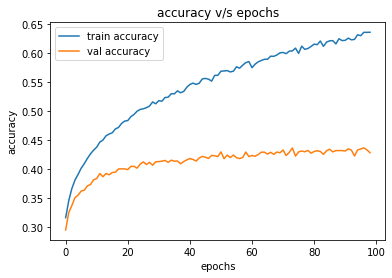

In [17]:
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy v/s epochs")
plt.plot(ta,label="train accuracy")
plt.plot(va,label="val accuracy")
plt.legend()
plt.savefig("accuracy_best.png")

In [25]:
output_train_ohe= np.argmax(output_train,axis=1)+1

In [27]:
output_train_ohe.shape

(16000,)

In [28]:
ohe_train = onehotEncoder(output_train_ohe,10)

In [69]:
confusionmatrix=normalized_confusion_marix(trainy,ohe_train)

In [70]:
confusionmatix = np.around(confusionmatrix,decimals=3)

In [71]:
confusionmatix

array([[0.619, 0.018, 0.051, 0.016, 0.083, 0.012, 0.031, 0.02 , 0.121,
        0.029],
       [0.016, 0.706, 0.008, 0.018, 0.024, 0.008, 0.031, 0.009, 0.067,
        0.114],
       [0.069, 0.009, 0.428, 0.075, 0.208, 0.061, 0.076, 0.023, 0.033,
        0.02 ],
       [0.038, 0.014, 0.066, 0.49 , 0.097, 0.116, 0.105, 0.025, 0.02 ,
        0.029],
       [0.057, 0.012, 0.104, 0.033, 0.592, 0.029, 0.075, 0.038, 0.041,
        0.019],
       [0.023, 0.008, 0.07 , 0.095, 0.074, 0.593, 0.064, 0.039, 0.012,
        0.022],
       [0.024, 0.011, 0.042, 0.054, 0.094, 0.024, 0.701, 0.012, 0.017,
        0.021],
       [0.026, 0.004, 0.028, 0.034, 0.095, 0.039, 0.023, 0.71 , 0.011,
        0.03 ],
       [0.091, 0.039, 0.024, 0.013, 0.034, 0.01 , 0.028, 0.01 , 0.715,
        0.037],
       [0.021, 0.057, 0.009, 0.016, 0.017, 0.019, 0.017, 0.016, 0.05 ,
        0.779]])

In [32]:
import seaborn as sns

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(precesion_recall(trainy,ohe_train).T, linewidths=.5)

AttributeError: 'tuple' object has no attribute 'T'

<Figure size 720x720 with 0 Axes>

In [55]:
pr,rec,_,_,_ =precesion_recall(trainy,ohe_train)

In [74]:
precesion,recall,tp,fp,fn = precesion_recall(trainy,ohe_train)

micro_f1,avg_prec_micro,avg_rec_micro = micro_scores(trainy,ohe_train)
macro_f1,avg_prec_macro,avg_rec_macro = macro_scores(trainy,ohe_train)

f1_score_per_class = np.around(((2*np.array(precesion)*np.array(recall))/(np.array(precesion)+np.array(recall))),decimals=2).reshape((10,1))
confusionmatrix = np.hstack((np.array(precesion).reshape((10,1)),np.array(recall).reshape((10,1)),f1_score_per_class))
df_per_class = pd.DataFrame(confusionmatrix,columns=["precesion","recall","F1_scores"],index=[str(x) for x in range(10)])

   precesion  recall  F1_scores
0     0.6264  0.6193       0.62
1     0.8090  0.7057       0.75
2     0.5143  0.4276       0.47
3     0.5838  0.4898       0.53
4     0.4535  0.5922       0.51
5     0.6487  0.5931       0.62
6     0.6046  0.7014       0.65
7     0.7893  0.7097       0.75
8     0.6551  0.7153       0.68
9     0.7079  0.7792       0.74


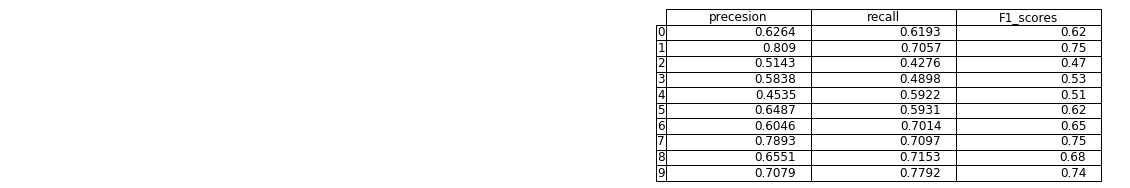

In [75]:
save_image(df_per_class,"score_best.jpg")